<h1>Компьютерные игры<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Выявление закономерностей, которые определяют успешность игры. 

**Цель исследования:** определить потенциально популярный продукт, чтобы спланировать рекламные кампании.

**Задача:** выявить закономерности, которые влияют на успешность игры.

**Ход исследования:**
1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы
6. Подвести итог

# 1. Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('.//data//games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
display('Количество строк в датафрейме:', data.shape[0])

'Количество строк в датафрейме:'

16715

In [4]:
print('Количество столбцов в датафрейме:', data.shape[1])

Количество столбцов в датафрейме: 11


# 2. Предобработка данных

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# Преобразование данных в нужный тип
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Год выпуска нужно поменять на int, год не может быть дробным числом*

In [8]:
data = data.astype({'year_of_release': 'Int64'})

Посмотрим поближе на рейтинг и на оценку пользователей. Хотелось бы, чтобы оценка пользователей была типа float.

In [9]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Это аббревиатура рейтингов. То есть возрастная категория

[расшифруем эти буквы благодаря интернет-источнику:](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

*E: 0+*

*M: 17+*

*T: 13+*

*E10+: 10+*

*K-A: 0+*

*AO: 18+*

*EC: 3+*

*RP: рейтинг ожидается*

То есть два рейтинга по названию разные, а по смыслу одинаковые: E (evryone) и K-A (Kids to Adults). RP: эти игры еще не оценили, видимо, игра в разработке

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Какая-то странная оценка 'tbd'

In [11]:
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


[узнаем, что: ](https://autogear.ru/article/171/345/tbd---chto-znachit-eto-sokraschenie/)  'tbd' - To Be Determined, то есть "Будет определено".Пользователи еще не оценили эту игру. Применим метод to_numeric, чтобы проигнорировать это и перевести данные в тип float. Удалять такое нельзя, очень много данных пропадет

In [12]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

In [13]:
# Пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это две одинаковые строки по пропускам. Там, где нет названия игры, невозможно определить жанр (и рейтинг соотвественно).Очень сомнительные строчки:)

Обработаем пропуски в процентах 

In [16]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('BuPu')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


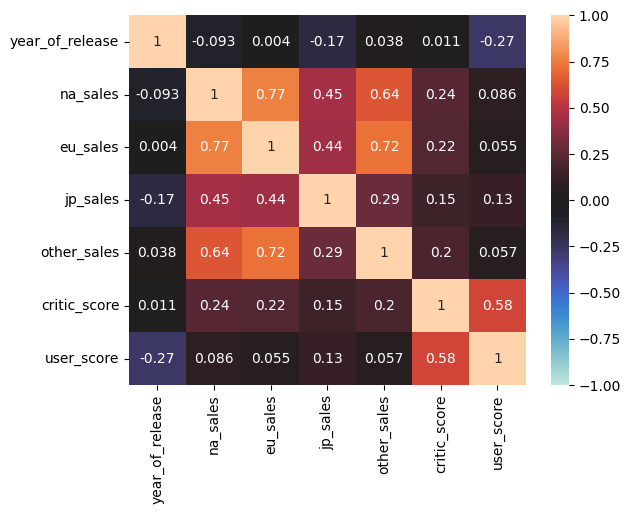

In [17]:
# Фильтрация только числовых столбцов
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot = True, vmin=-1, vmax=1, center= 0);

In [18]:
data = data.dropna(subset = ['name', 'genre'])

Оценки критиков, пользователей, а также рейтинг не получится чем-то заполнить. Оставим так, и будем работать с таким датафреймом

In [19]:
data['name'].value_counts().head(50)

name
Need for Speed: Most Wanted                      12
Ratatouille                                       9
LEGO Marvel Super Heroes                          9
FIFA 14                                           9
Madden NFL 07                                     9
LEGO The Hobbit                                   8
FIFA Soccer 13                                    8
Terraria                                          8
LEGO Harry Potter: Years 5-7                      8
Monopoly                                          8
Lego Batman 3: Beyond Gotham                      8
Cars                                              8
FIFA 15                                           8
Angry Birds Star Wars                             8
The LEGO Movie Videogame                          8
LEGO Star Wars II: The Original Trilogy           8
LEGO Jurassic World                               8
Madden NFL 08                                     8
FIFA 12                                           7
LEGO In

In [20]:
# data['name'].str.extract(r'(\d{2,4})', expand=False).astype(float).describe()

Проверка на неявные дубликаты

In [21]:
data_duplicated_one = data[['name', 'platform', 'year_of_release', 'genre', 'rating']]
data_duplicated_one[data_duplicated_one.duplicated()]

,name,platform,year_of_release,genre,rating
16230,Madden NFL 13,PS3,2012,Sports,E


In [22]:
data_duplicated_one.loc[data_duplicated_one['name']== 'Madden NFL 13']

,name,platform,year_of_release,genre,rating
507,Madden NFL 13,X360,2012,Sports,E
604,Madden NFL 13,PS3,2012,Sports,E
3986,Madden NFL 13,Wii,2012,Sports,E
5887,Madden NFL 13,PSV,2012,Sports,E
7066,Madden NFL 13,WiiU,2012,Sports,E
16230,Madden NFL 13,PS3,2012,Sports,E


In [23]:
data.loc[data['name']=='Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [24]:
condition_name = data['name'] == 'Madden NFL 13'
condition_platform = data['platform'] == 'PS3'
# Комбинируем оба условия
combined_condition = condition_name & condition_platform
# Удаляем строки, удовлетворяющие обоим условиям, и сбрасываем индексы
data = data[~combined_condition].reset_index(drop=True)

Посмотрим без столбца платформы

In [25]:
data_duplicated_two = data[['name', 'year_of_release', 'genre', 'rating']]
data_duplicated_two[data_duplicated_two.duplicated()]

,name,year_of_release,genre,rating
23,Grand Theft Auto V,2013,Action,M
35,Call of Duty: Black Ops II,2012,Shooter,M
37,Call of Duty: Modern Warfare 3,2011,Shooter,M
41,Call of Duty: Black Ops,2010,Shooter,M
55,Call of Duty: Modern Warfare 2,2009,Shooter,M
...,...,...,...,...
16688,Metal Gear Solid V: Ground Zeroes,2014,Action,M
16705,SCORE International Baja 1000: The Official Game,2008,Racing,NaN
16706,Samurai Warriors: Sanada Maru,2016,Action,NaN
16709,Spirits & Spells,2003,Platform,NaN


Одни и те же игры могут принадлежать разным платформам. Такое явление нельзя назвать дубликатом

In [26]:
# Проверка на явные дубликаты
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Явных дубликатов нет

In [27]:
print('Количество строк в датафрейме:', len(data))
# а было 16715 строк
# удалили 4 строки, все сходится

Количество строк в датафрейме: 16711


Подсчет суммарных продаж во всех регионах 

In [28]:
#def sum_sales (row):
    #total_sum_sales = row['na_sales']+ row['eu_sales']+ row['jp_sales'] + row['other_sales']
    #return total_sum_sales
#data['sum_sales'] = data.apply(sum_sales, axis=1)
data['sum_sales'] =data [['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# 3. Исследовательский анализ данных

### 3.1 Сколько игр выпускалось в разные годы

In [29]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count' )\
.sort_values(by='name').style.background_gradient(cmap='summer_r')

,name
year_of_release,
1980,9
1984,14
1985,14
1988,15
1990,16
1987,16
1989,17
1983,17
1986,21


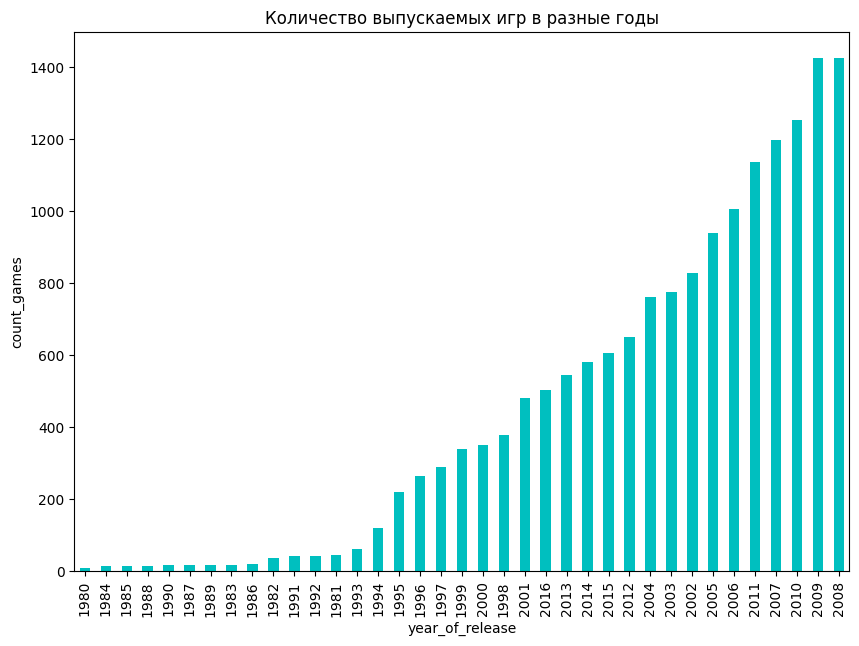

In [30]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count' )\
.sort_values(by='name').plot(kind='bar', facecolor='c', legend = False, figsize=(10,7))
plt.title('Количество выпускаемых игр в разные годы');
plt.ylabel('count_games');
plt.xlabel('year_of_release');

>Я считаю данные за все года не важны. [1990-е годы были ознаменованы заметными инновациями в компьютерных играх.](https://ru.wikipedia.org/wiki/%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80#2001%E2%80%942010), а конкретно с 1994 пошел заметный рост количетсва игр.  От него и стоит вести отсчет популяризации компьютерных игр.
2008 и 2009 были пиковыми. Потом игр стали выпускать меньше. Но может быть они стали интереснее? Или сложнее по разработке. Также данная динамика может быть связана с доступностью и целевой аудиторией.  

Посмотрим на прибыльность

In [31]:
data.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum).sort_values(by= 'sum_sales').style.background_gradient(cmap='pink_r')

,sum_sales
year_of_release,
1980,11.380000
1983,16.800000
1987,21.700000
1982,28.880000
1991,32.230000
1981,35.680000
1986,37.080000
1993,45.990000
1988,47.210000


В 2008 и 2009 года был пик не только по количеству выпускаемых игр, но и по прибыльности от этих игр. 

---

### 3.2 Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [32]:
data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = sum).sort_values(by= 'sum_sales').style.background_gradient(cmap='Blues')

,sum_sales
platform,
PCFX,0.030000
GG,0.040000
3DO,0.100000
TG16,0.160000
WS,1.420000
NG,1.440000
SCD,1.860000
DC,15.950000
GEN,28.350000


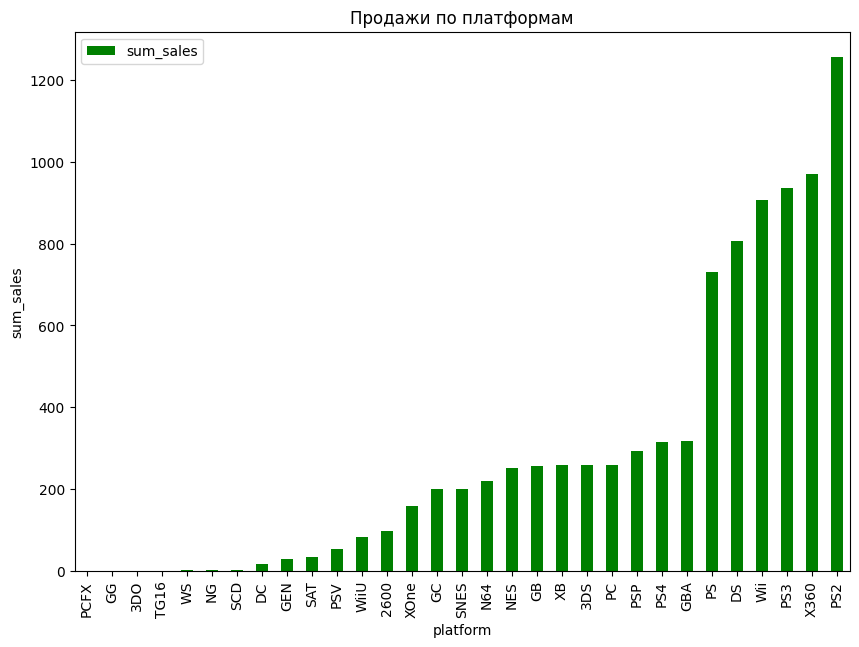

In [33]:
data.pivot_table(index = 'platform',
                 values = 'sum_sales', 
                 aggfunc = sum).sort_values(by= 'sum_sales').plot(kind='bar', facecolor='green', figsize=(10,7))
plt.title('Продажи по платформам');
plt.ylabel('sum_sales');
plt.xlabel('platform');

Исходя из таблицы и диаграммы наиболее прибыльными являются следущие платформы:

* PS2

* X360

* PS3

* Wii

* DS

* PS

Построим как менялась выручка самых прибыльных пратформ по годам

In [34]:
data_platform_by_year = data.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum, columns = 'platform')
data_platform_by_year = data_platform_by_year[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS' ]]
data_platform_by_year.style.background_gradient(cmap='Blues')

platform,PS2,X360,PS3,Wii,DS,PS
year_of_release,,,,,,
1980,nan,nan,nan,nan,nan,nan
1981,nan,nan,nan,nan,nan,nan
1982,nan,nan,nan,nan,nan,nan
1983,nan,nan,nan,nan,nan,nan
1984,nan,nan,nan,nan,nan,nan
1985,nan,nan,nan,nan,0.020000,nan
1986,nan,nan,nan,nan,nan,nan
1987,nan,nan,nan,nan,nan,nan
1988,nan,nan,nan,nan,nan,nan


Присуствует какое-то выбивающееся значения на платформе DS В 1985 году.

In [35]:
data.loc[(data['platform']== 'DS')& (data['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15954,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Это, видимо, какая-то опечатка. [DS в Японии](https://ru.wikipedia.org/wiki/Nintendo_DS) была выпущена только в 2004 года. Удалим эту строку. От одной строки наш анализ не изменится. А выбивающееся значение не будет мешать.

In [36]:
data = data.query("index != 15954").reset_index(drop=True)
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16705,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16706,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
16707,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16708,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN,0.01
16709,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01


In [37]:
# датафрейм не пострадал
data.loc[(data['platform']== 'DS')& (data['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


In [38]:
data_platform_by_year = data.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = sum, columns = 'platform')
data_platform_by_year = data_platform_by_year[['PS', 'PS2', 'PS3', 'Wii', 'DS', 'X360']]
data_platform_by_year.style.background_gradient(cmap='Blues')

platform,PS,PS2,PS3,Wii,DS,X360
year_of_release,,,,,,
1980,nan,nan,nan,nan,nan,nan
1981,nan,nan,nan,nan,nan,nan
1982,nan,nan,nan,nan,nan,nan
1983,nan,nan,nan,nan,nan,nan
1984,nan,nan,nan,nan,nan,nan
1985,nan,nan,nan,nan,nan,nan
1986,nan,nan,nan,nan,nan,nan
1987,nan,nan,nan,nan,nan,nan
1988,nan,nan,nan,nan,nan,nan


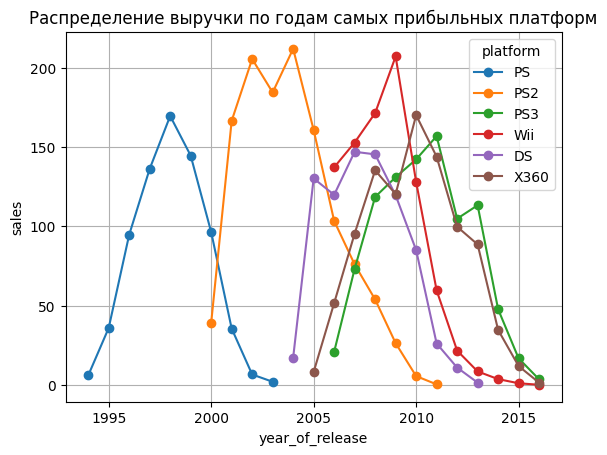

In [39]:
data_platform_by_year.plot(title = 'Распределение выручки по годам самых прибыльных платформ', marker = 'o')
plt.grid(True)
plt.ylabel('sales');

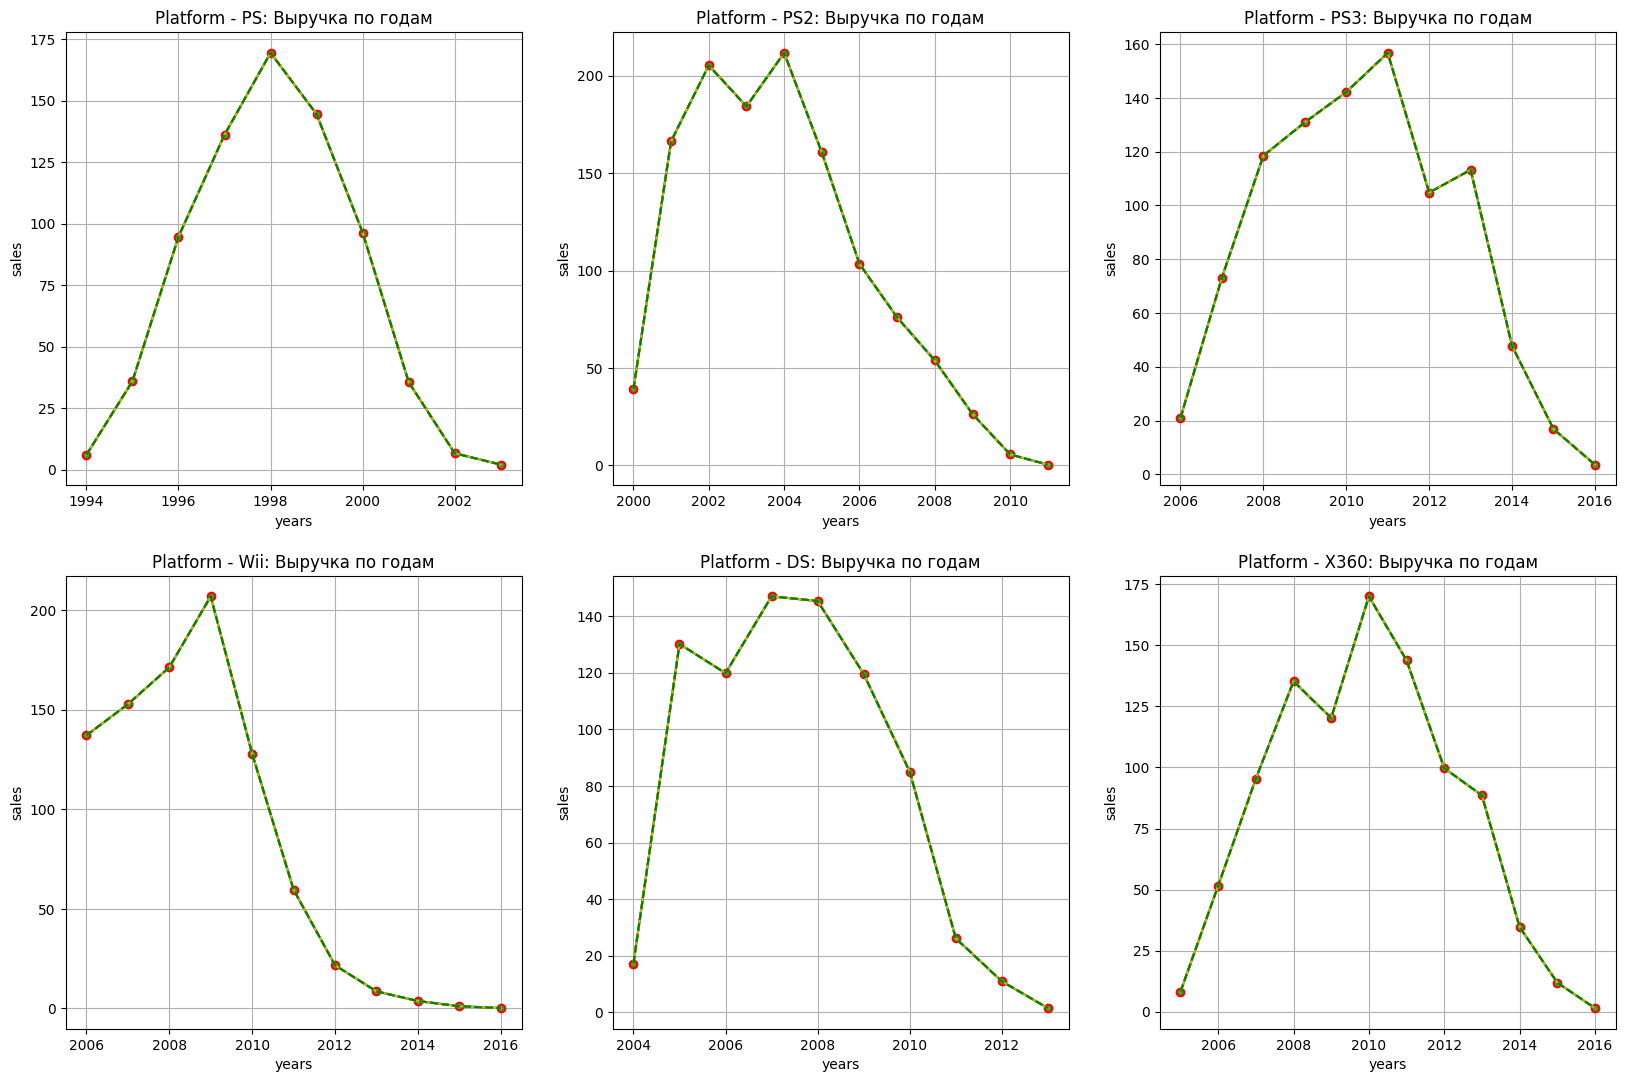

In [40]:
# смотрим ближе
platforms_by_year = ['PS', 'PS2', 'PS3', 'Wii', 'DS', 'X360']
line_styles_year = ['o-r', '-', '--', '--.', '-y', '--g']  # Стили линий

plt.figure(figsize=(20, 20))

for i, platform_name in enumerate(platforms_by_year):
    y = data_platform_by_year[[platform_name]]
    x = data_platform_by_year.index
    
    plt.subplot(3, 3, i + 1)
    for style in line_styles_year:
        plt.plot(x, y, style)
    
    plt.title(f'Platform - {platform_name}: Выручка по годам')
    plt.ylabel('sales')
    plt.xlabel('years')
    plt.grid(True)

warnings.filterwarnings('ignore')
plt.show()

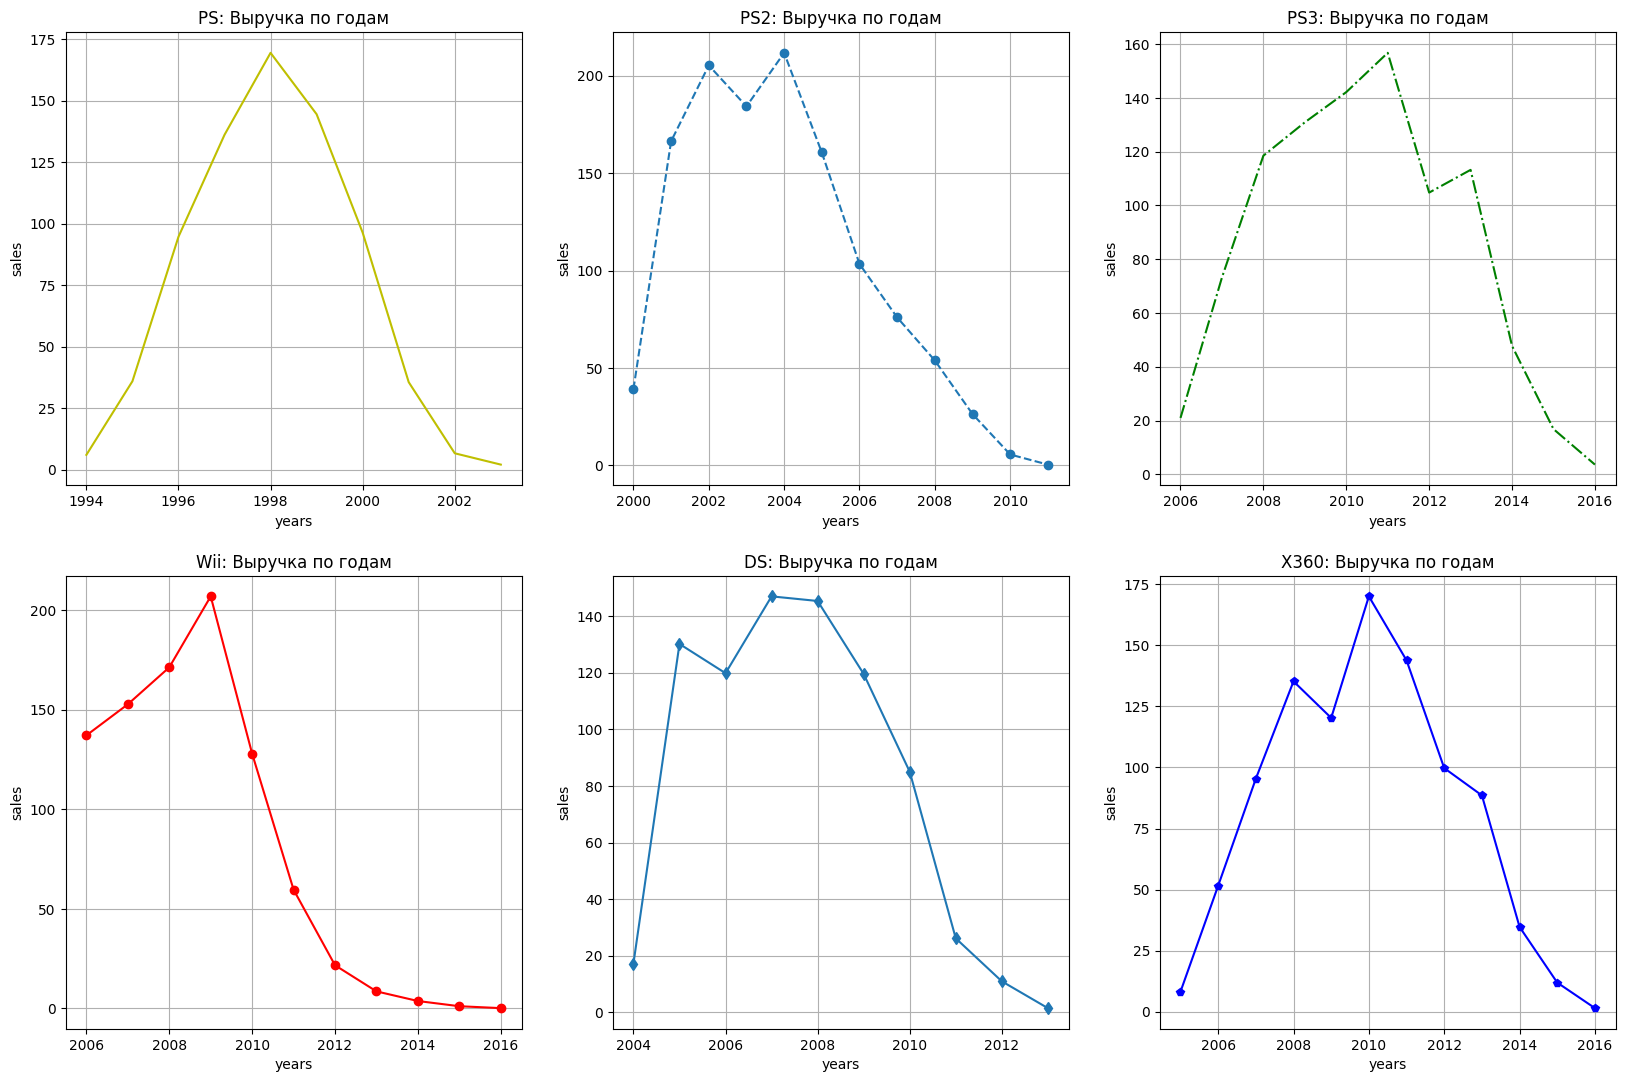

In [41]:
platforms = ['PS', 'PS2', 'PS3', 'Wii', 'DS', 'X360']
line_styles = ['-y', '--o', '-.g', '-or', '-d', '-pb']  # Соответствующие стили линий

x = data_platform_by_year.index

plt.figure(figsize=(20, 20))

for i, (platform, style) in enumerate(zip(platforms, line_styles), start=1):
    y = data_platform_by_year[[platform]]
    plt.subplot(3, 3, i)
    plt.plot(x, y, style)
    plt.title(f'{platform}: Выручка по годам')
    plt.ylabel('sales')
    plt.xlabel('years')
    plt.grid(True)

plt.show()

1. Из таблицы и графика видно, что фирма [Sony](https://ru.wikipedia.org/wiki/PlayStation),которой принадлежит Playstation, не стоит на месте, развивается и успела за данные годы несколько раз перейти в новое поколение.

    >* Когда они перешли с PS на PS2, продажи PS2 резко выросли, а PS упали. Смысл дальше развивать эту платформу нет. 

    >* А вот случай с PS2 и PS3 интереснее. Да, продажи у PS2 упали, но не до такой степени, чтобы сразу закрывать платформу. На протяжении 4 лет(2006-2009) у PS2 еще были фанаты. Но несмотря на это PS3 со своими новвоведеними заставила закрыться платфоррму PS2

    >* Что не скажешь о PS, у них хорошие продажи шли 2 года (2000-2001) после внедрения PS2

    >* Падение продаж у PS3 я связываю с выпуском новой платформы PS4(В России была выпущена в 2016 году).

2. Фирма  [Nintendo](https://ru.wikipedia.org/wiki/Nintendo) сначала запустила платформу DS, которая просуществовала 10 лет.
    >* Позже фирма запустила платформу Wii, у которой тоже упали продажи, как я думаю, вследствие появление новых платформ: 3DS, Wii U, Nintendo Switch

3. Платформа [Х360](https://ru.wikipedia.org/wiki/Xbox_360) принадлежит компании Microsoft
    >* Падение продаж я связываю с выходом новых платформ [Xone](https://ru.wikipedia.org/wiki/Xbox_One)

    >**Sony, Microsoft, Nintendo являются конкурирующими фирмами между собой, что подтверждает не интернет-источники, но графики с таблицами. Эти фирмы не стоят на месте, всегда готовы радовать своих фанатов новыми продуктами**

---

### 3.3 Данные за соответствующий актуальный период.

*Так как мы строим прогноз на 2017 год, то данные будем брать вблизь лежащие к 2017. Так как тенденция роста показателей к 2017 году будет приближенной. Я хочу взять с 2013 по 2016. Чтобы точно увидеть, как на смену старым платформам приходят новые платформы.*

In [42]:
data_2013_on_2016 = data.query('year_of_release in [2013, 2014, 2015,2016]').reset_index(drop=True)
data_2013_on_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


---

In [43]:
#  платформы-лидеры
data_2013_on_2016.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = sum)\
.sort_values(by= 'sum_sales').style.background_gradient(cmap='Oranges')

,sum_sales
platform,
DS,1.540000
PSP,3.500000
Wii,13.660000
PSV,32.990000
PC,39.430000
WiiU,64.630000
X360,136.800000
3DS,143.250000
XOne,159.320000


>А вот и долгожданное появление PS4. В пункте выше я связала падение продаж PS3 с появлением новой платформы PS4. А старенькую Хbox сменила новая платформа XOne. Аналогично для DS, ей на смену пришла 3DS; и на место Wii пришла WiiU

>*Конечно же, с PS4 никто не может сравниться. Может там больше интересных игр?*

>**Так как мы делаем прогноз на 2017 год, то потенциально прибыльными будем считать следующие платформы: PS4, XOne, 3DS, WiiU, PS3**

>*Посмотрим на внешнюю и внутреннюю конкуренцию. Внутрення - между двумя платформами внутри одной компании:*

>* PS4 против PS3 (SONY)
>* Xone против X360 (Microsoft)
?* 3DS против DS и WiiU против Wii (Nintendo)

>*И внешняя - между компаниями*

***

### 3.4 Глобальные продажи игр в разбивке по платформам

In [44]:
# Глобальные продажи игр в разбивке по платформам
data_2013_on_2016.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = sum)\
.sort_values(by= 'sum_sales').query('platform == ["PS4","PS3", "XOne","X360", "3DS", "DS","WiiU","Wii" ] ')

,sum_sales
platform,
DS,1.54
Wii,13.66
WiiU,64.63
X360,136.80
3DS,143.25
XOne,159.32
PS3,181.43
PS4,314.14


In [45]:
data_2013_on_2016_top4_sales = data_2013_on_2016.pivot_table(index = 'year_of_release', 
                                                             values = 'sum_sales', 
                                                             aggfunc = sum, 
                                                             columns = 'platform')
data_2013_on_2016_top4_sales =data_2013_on_2016_top4_sales[["PS4","PS3", "XOne","X360", "3DS", "DS","WiiU","Wii" ]]
data_2013_on_2016_top4_sales.style.background_gradient(cmap='YlOrRd')

platform,PS4,PS3,XOne,X360,3DS,DS,WiiU,Wii
year_of_release,,,,,,,,
2013,25.990000,113.250000,18.960000,88.580000,56.570000,1.540000,21.650000,8.590000
2014,100.000000,47.760000,54.070000,34.740000,43.760000,nan,22.030000,3.750000
2015,118.900000,16.820000,60.140000,11.960000,27.780000,nan,16.350000,1.140000
2016,69.250000,3.600000,26.150000,1.520000,15.140000,nan,4.600000,0.180000


>Как видно из таблицы, новые платформы действительно хорошо сменили старые. Но даже их продажи упали к 2016 году. То есть для прогноза на 2017 год выбираем потенциально прибыльные платформы: PS4, XOne, 3DS, WiiU. 

>*Видимо, на смену им придут более новые платформы*

Построим график и таблицу по суммарным продажам самых потенциально-прибыльных платформ 

In [46]:
data_2013_on_2016_top4_sales =data_2013_on_2016_top4_sales[["PS4", "XOne","3DS","WiiU" ]]
data_2013_on_2016_top4_sales.style.background_gradient(cmap='YlGn')

platform,PS4,XOne,3DS,WiiU
year_of_release,,,,
2013,25.990000,18.960000,56.570000,21.650000
2014,100.000000,54.070000,43.760000,22.030000
2015,118.900000,60.140000,27.780000,16.350000
2016,69.250000,26.150000,15.140000,4.600000


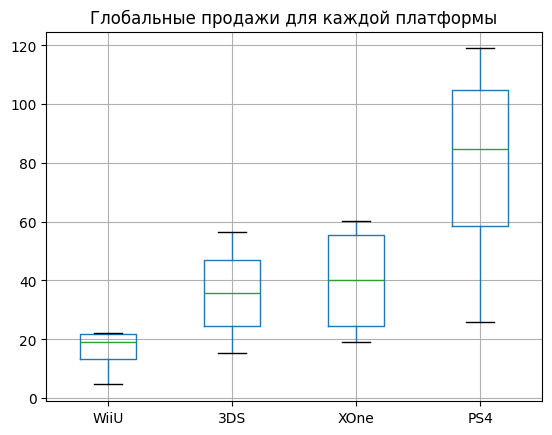

In [47]:
data_2013_on_2016_top4_sales[['WiiU', '3DS', 'XOne', 'PS4']].boxplot()
plt.title('Глобальные продажи для каждой платформы');
plt.show()

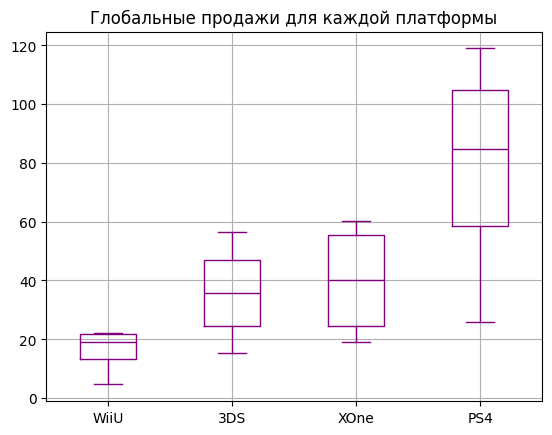

In [48]:
data_2013_on_2016_top4_sales[['WiiU', '3DS', 'XOne', 'PS4']].boxplot(color='purple')
plt.title('Глобальные продажи для каждой платформы');
plt.show()

Построим таблицу и график по количеству игр от каждой потенциально-прибыльной платформы

In [49]:
data_2013_on_2016_intermediate = data_2013_on_2016.query('platform == ["PS4", "XOne", "3DS", "WiiU", ] ')
data_2013_on_2016_top4_count_games = data_2013_on_2016_intermediate.pivot_table(index = 'year_of_release', 
                                                                   values = 'name', 
                                                                   aggfunc = 'count', 
                                                                   columns = 'platform')
data_2013_on_2016_top4_count_games.style.background_gradient(cmap='OrRd')

platform,3DS,PS4,WiiU,XOne
year_of_release,,,,
2013,91,16,42,19
2014,80,75,31,61
2015,86,137,28,80
2016,46,164,14,87


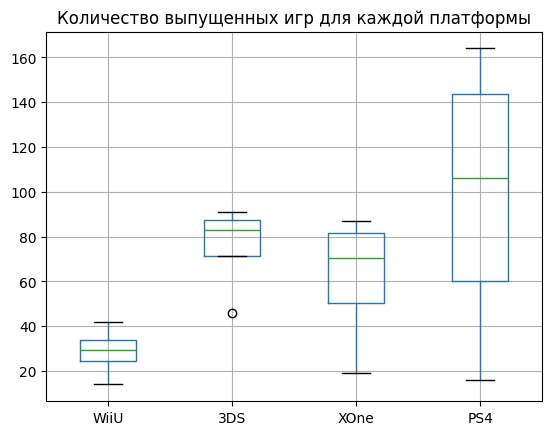

In [50]:
data_2013_on_2016_top4_count_games[['WiiU', '3DS', 'XOne', 'PS4']].boxplot()
plt.title('Количество выпущенных игр для каждой платформы');
plt.show()

>*На момент 2013-2016 годов видим следующее:*
>* Как и предполагалось, PS4 лидирует и по количеству выпускаемых игр, и по прибыльности (видимо, игры действительно захватывающие)
>* За ней идет XOne по таким же характеристикам
>* 3 место отдатим 3DS
>* 4 место WiiU

>*компания Nintendo больше уделяла внимание 3DS :) Выпускала больше игр для этой консоли, взамен получала больше прибыли от нее*

---

### 3.5 Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков.

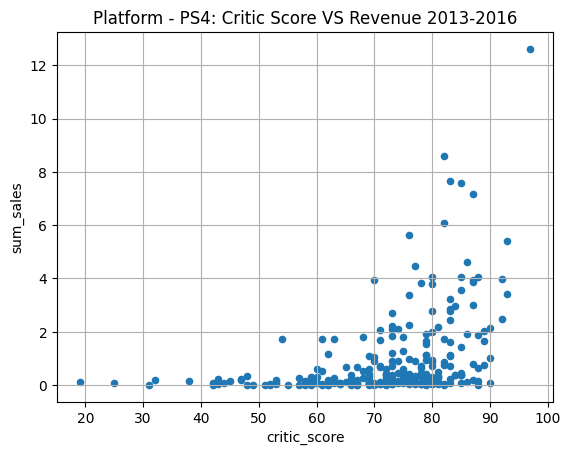

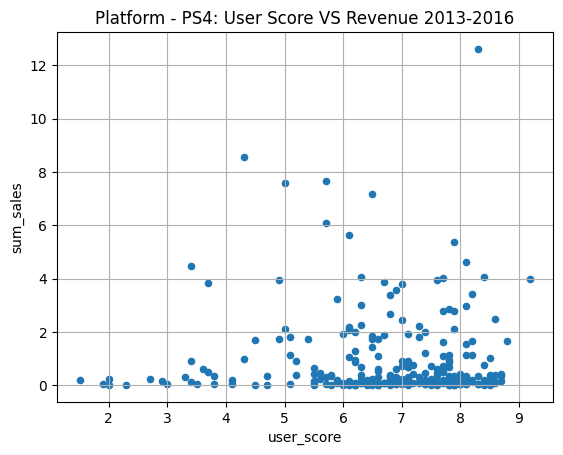

Уровень корреляции между оценкой пользователя и суммой продаж: -0.03195711020455643
Уровень корреляции между оценкой критика и суммой продаж: 0.4065679020617816


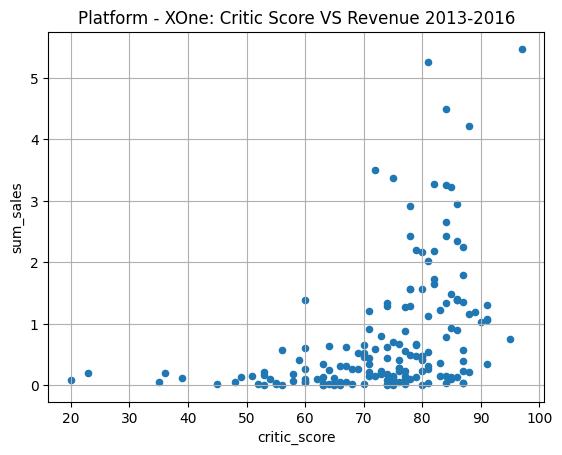

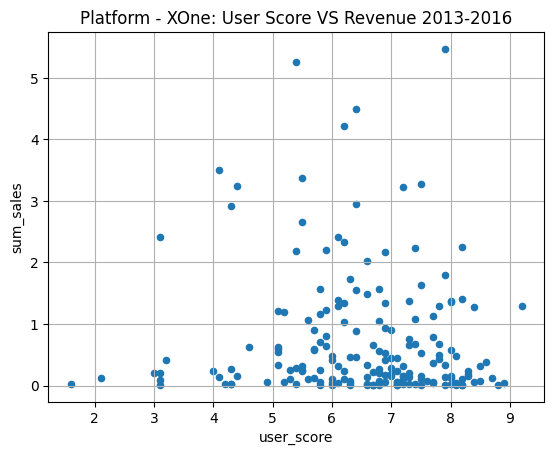

Уровень корреляции между оценкой пользователя и суммой продаж: -0.06892505328279415
Уровень корреляции между оценкой критика и суммой продаж: 0.41699832800840164


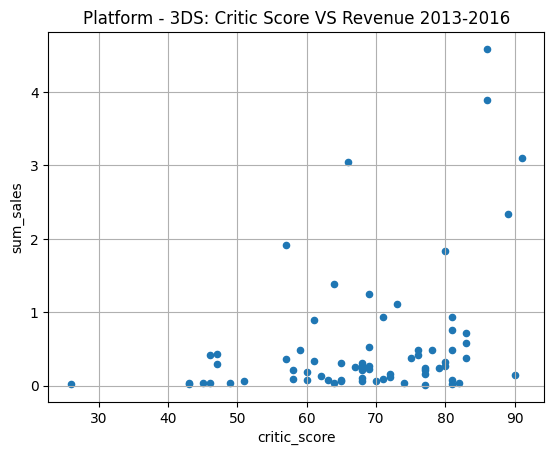

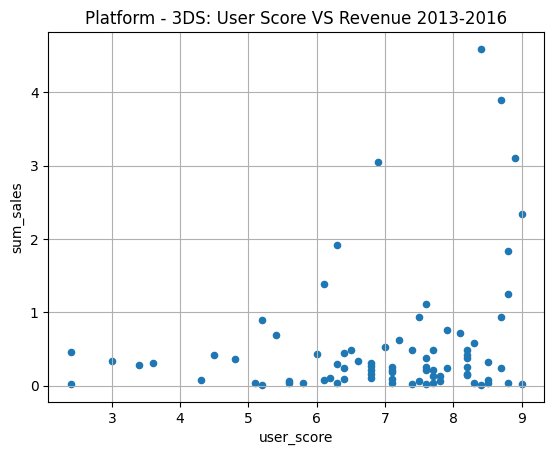

Уровень корреляции между оценкой пользователя и суммой продаж: 0.24150411773563016
Уровень корреляции между оценкой критика и суммой продаж: 0.35705661422881035


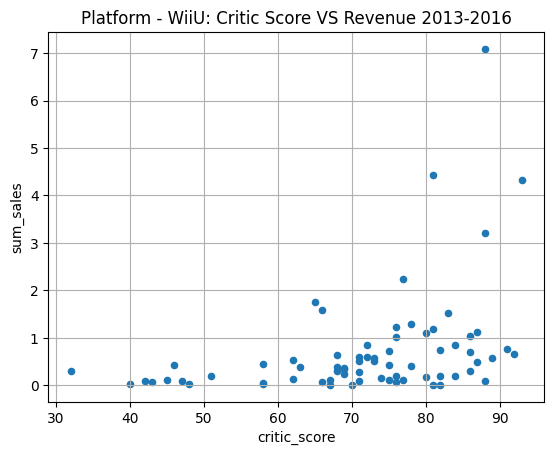

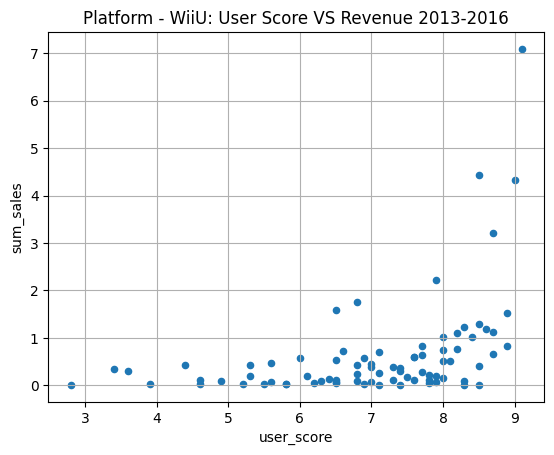

Уровень корреляции между оценкой пользователя и суммой продаж: 0.4193304819266187
Уровень корреляции между оценкой критика и суммой продаж: 0.3764149065423912


In [51]:
platforms = ['PS4', 'XOne', '3DS', 'WiiU']
for platform_name in platforms:
    platform_df = data_2013_on_2016.loc[data_2013_on_2016['platform'] == platform_name]
    rev_critic_rev = platform_df['sum_sales'].corr(platform_df['critic_score'])
    rev_user_rev = platform_df['sum_sales'].corr(platform_df['user_score'])
    platform_df.plot(
        title = f'Platform - {platform_name}: Critic Score VS Revenue 2013-2016', 
        kind='scatter' ,
        x = 'critic_score', 
        y ='sum_sales',
    )
    plt.grid(True)
    platform_df.plot(
        title = f'Platform - {platform_name}: User Score VS Revenue 2013-2016', 
        kind='scatter' ,
        x = 'user_score', 
        y ='sum_sales'
    )
    plt.grid(True)
    plt.show()
    print(f'Уровень корреляции между оценкой пользователя и суммой продаж: {rev_user_rev}')
    print(f'Уровень корреляции между оценкой критика и суммой продаж: {rev_critic_rev}')

>PS4:
>* Зависимости между оценкой критика и продажами почти нет. Но, если критики ставят высокую оценку, то больше шансов повысить продажи.
>* Зависимость продаж от оценки пользователей не наблюдается. Может, есть зависимость от жанра? или категории

>XOne:
>* Зависимости почти нет. Но, если критики ставят оценку выше 70, то продажи немного увеличиваются.
>* Зависимость продаж от оценки пользователей не наблюдается.

>3DS:
>* Зависимость между оценкой критика и продажами отсуствует
>* Зависимость между оценкой пользователя и продажами отсутствует

>WiiU:
>* Зависимость между оценкой критика и продажами не наблюдается
>* На платформе WiiU наблюдается слабая зависимость продаж от оценки пользователей. Если пользователи ставят оценку 9 и выше, то продажи улучшаются. 

***

In [52]:
# Делаем выводы с продажами игр на других платформах
data_2013_on_2016_other_platform = data_2013_on_2016.query('platform != ["PS4", "XOne","3DS","WiiU"] ').reset_index(drop=True)
data_2013_on_2016_other_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
3,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
4,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1172,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1173,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
1174,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [53]:
data_2013_on_2016_other_platform.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = sum)\
.sort_values(by= 'sum_sales').style.background_gradient(cmap='Oranges')

,sum_sales
platform,
DS,1.540000
PSP,3.500000
Wii,13.660000
PSV,32.990000
PC,39.430000
X360,136.800000
PS3,181.430000


In [54]:
data_2013_on_2016_other_platform_sum_sales = data_2013_on_2016_other_platform.pivot_table(index = 'year_of_release', 
                                                             values = 'sum_sales', 
                                                             aggfunc = sum, 
                                                             columns = 'platform')
data_2013_on_2016_other_platform_sum_sales.style.background_gradient(cmap='YlOrRd')

platform,DS,PC,PS3,PSP,PSV,Wii,X360
year_of_release,,,,,,,
2013,1.540000,12.380000,113.250000,3.140000,10.590000,8.590000,88.580000
2014,nan,13.280000,47.760000,0.240000,11.900000,3.750000,34.740000
2015,nan,8.520000,16.820000,0.120000,6.250000,1.140000,11.960000
2016,nan,5.250000,3.600000,nan,4.250000,0.180000,1.520000


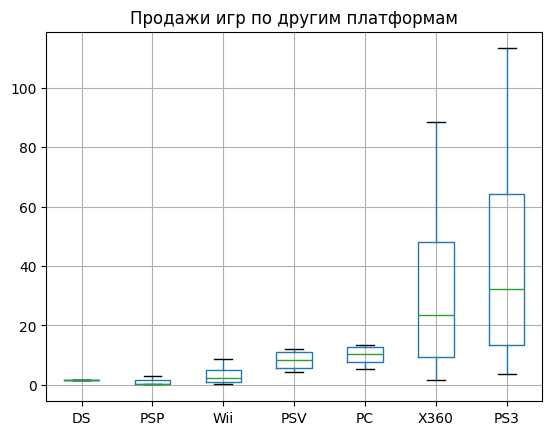

In [55]:
data_2013_on_2016_other_platform_sum_sales[['DS', 'PSP', 'Wii', 'PSV', 'PC', 'X360', 'PS3' ]].boxplot();
plt.title('Продажи игр по другим платформам');

>Из других платформ лидерами ялвяются PS3 B X360, их мы отбросили выше, так как на смену им пришли новые платформы. Из-за этого их продажи к 2016 году упали.

Посмотрим на количество игр по другим платформам

In [56]:
data_2013_on_2016_top4_other_platform_count_games = data_2013_on_2016_other_platform\
.pivot_table(index = 'year_of_release', 
             values = 'name', 
             aggfunc = 'count',
             columns = 'platform')
data_2013_on_2016_top4_other_platform_count_games.style.background_gradient(cmap='OrRd')

platform,DS,PC,PS3,PSP,PSV,Wii,X360
year_of_release,,,,,,,
2013,8.000000,38.000000,126.000000,54.000000,63.000000,12.000000,75.000000
2014,nan,47.000000,108.000000,10.000000,100.000000,6.000000,63.000000
2015,nan,50.000000,73.000000,3.000000,110.000000,4.000000,35.000000
2016,nan,54.000000,38.000000,nan,85.000000,1.000000,13.000000


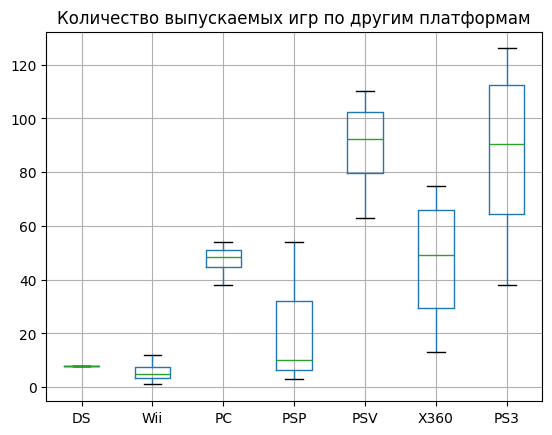

In [57]:
data_2013_on_2016_top4_other_platform_count_games[['DS', 'Wii', 'PC','PSP','PSV', 'X360', 'PS3' ]].boxplot();
plt.title('Количество выпускаемых игр по другим платформам');

>**Хоть продажи PSV малы,но  на нее до 2017 года не переставали выпускать игры. Преданным фанатам PSV можно только позавидовать**
Конечно же PS3 и X360 остаются лидерами по соотношению количества игр и продаж (до появления новых PS4 и XOne)

### 3.6 Oбщее распределение игр по жанрам.

In [58]:
data_2013_on_2016.pivot_table(index = 'genre', values = 'name', aggfunc = 'count')\
.sort_values(by= 'name').style.background_gradient(cmap='copper_r')

,name
genre,
Puzzle,17
Strategy,56
Simulation,62
Platform,74
Fighting,80
Racing,85
Misc,155
Shooter,187
Sports,214


>Упор делает на жанр "Action"

In [59]:
data_2013_on_2016.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = sum)\
.sort_values(by= 'sum_sales').style.background_gradient(cmap='magma_r')

,sum_sales
genre,
Puzzle,3.170000
Strategy,10.080000
Simulation,21.760000
Adventure,23.640000
Fighting,35.310000
Racing,39.890000
Platform,42.630000
Misc,62.820000
Role-Playing,145.890000


>Экшен самый попялрный жанр не только у фанатов, но и у разработчиков. Оно и понятно :) И игр в этом жанре выпускают больше, и люди покупают его лучше. 

>Но по продажам жанры Shooter, Sports, Role-Playing не сильно уступают жанру Action. Несмотря на то, что разработчики не охотнее выпускают игры в этом жанре. 

[Shooter - стрелялка](https://ru.wikipedia.org/wiki/%D0%A8%D1%83%D1%82%D0%B5%D1%80)

[Sports - что-то спортивное(футбольчик, бег).](https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80) Помню, как в Мвидео забегали с друзьями поиграть на xbox в такой вид игры. Но потом Мвидео понял, что это надо убирать это, слишком много детей заходили просто поиграть.

**То есть количество игр не так сильно свидетельствует о прибыльности жанра**

In [60]:
# средние значения продаж
data_2013_on_2016.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median')\
.sort_values(by= 'sum_sales').style.background_gradient(cmap='magma_r')

,sum_sales
genre,
Adventure,0.030000
Puzzle,0.060000
Strategy,0.080000
Misc,0.100000
Simulation,0.100000
Action,0.110000
Racing,0.120000
Fighting,0.125000
Role-Playing,0.125000


<div class="alert alert-block alert-success">
Средние продажи от стрелялок гораздо выше, чем у экшена. Экшен вовсе отскачил. стрелялкам,возможно, не хватает больше хорошей рекламы.
</div>

# 4. Изучение пользователей каждого региона

### 4.1 Топ-5 платформ

In [61]:
def create_pivot_table(data, index, aggfunc, values=['na_sales', 'eu_sales', 'jp_sales'], margins=True):

    # Список доступных цветовых карт
    color_maps = [
        'Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 
        'Greens', 'Greys', 'Oranges', 'OrRd', 'Paired', 'Pastel1', 'Pastel2', 
        'PiYG', 'PRGn', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 
        'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 
        'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 
        'autumn', 'binary', 'bone', 'cool', 'copper', 'gist_earth', 'gist_gray', 
        'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 
        'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'inferno', 'magma', 
        'nipy_spectral', 'ocean', 'pink', 'plasma', 'prism', 'rainbow', 'seismic', 
        'spring', 'summer', 'tab10', 'tab20', 'tab20b', 'tab20c', 'terrain', 
        'twilight', 'twilight_shifted', 'viridis', 'winter'
    ]
    # Создание сводной таблицы
    pivot_table = data.pivot_table(index=index, values=values, aggfunc=aggfunc, margins=margins)
    
    # Сортировка по первому столбцу из списка values
    sorted_table = pivot_table.sort_values(by=values[0])
    
    # Применение градиента фона
    styled_table = sorted_table.style.background_gradient(cmap=random.choice(color_maps))
    
    return styled_table

In [62]:
# суммарные продажи
create_pivot_table(data_2013_on_2016, index='platform', aggfunc=sum)

,eu_sales,jp_sales,na_sales
platform,,,
PSP,0.170000,3.290000,0.000000
DS,0.850000,0.000000,0.570000
PSV,6.100000,18.590000,5.040000
Wii,5.930000,0.050000,6.560000
PC,25.360000,0.000000,11.110000
WiiU,19.850000,10.880000,29.210000
3DS,30.960000,67.810000,38.200000
PS3,67.810000,23.350000,63.500000
X360,42.520000,0.510000,81.660000


In [63]:
#Посмотрим на средние продажи
create_pivot_table(data_2013_on_2016, index='platform', aggfunc="median", margins=False)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.000000,0.060000,0.000000
PC,0.060000,0.000000,0.000000
PSP,0.000000,0.020000,0.000000
PSV,0.000000,0.030000,0.000000
DS,0.095000,0.000000,0.015000
PS3,0.020000,0.030000,0.030000
Wii,0.100000,0.000000,0.040000
PS4,0.080000,0.010000,0.060000
WiiU,0.070000,0.000000,0.090000


Средние продажи могут быть очень неожиданными.
В Европе первые два лидера по продажам платформ являются wii и ds, хотя они в сумме не так много дохода приносят. Но что же поделать если больше всего прибыли приносит PS4 и X360 c XOne, и по средней продаже они рядом.

***

### 4.2 Северная Америка

*Разберемся с Северной Америкой:*
- найдем нетоповые платформы, заменим их на "Другие"
- узнаем продажи платформ в сумме и в долях

In [64]:
import random


def pivot_and_filter(df, index_col, values_col, new_column, threshold=None, aggfunc=sum, replace_value="Другие"):

    # Список доступных цветовых карт
    color_maps = [
        'Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 
        'Greens', 'Greys', 'Oranges', 'OrRd', 'Paired', 'Pastel1', 'Pastel2', 
        'PiYG', 'PRGn', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 
        'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 
        'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 
        'autumn', 'binary', 'bone', 'cool', 'copper', 'gist_earth', 'gist_gray', 
        'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 
        'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'inferno', 'magma', 
        'nipy_spectral', 'ocean', 'pink', 'plasma', 'prism', 'rainbow', 'seismic', 
        'spring', 'summer', 'tab10', 'tab20', 'tab20b', 'tab20c', 'terrain', 
        'twilight', 'twilight_shifted', 'viridis', 'winter'
    ]

    # Создаем сводную таблицу
    pivot_df = df.pivot_table(index=index_col, values=values_col, aggfunc=aggfunc, margins=True)
    
    # Применяем сортировку по значениям
    sorted_df = pivot_df.sort_values(by=values_col)

    # Определим порог продаваемости, например, медианное значение продаж
    threshold = sorted_df[values_col].median()
    print(f"Порог продаваемости (медианное значение):", threshold)

    display("Таблица до исправлений", sorted_df.style.background_gradient(cmap=random.choice(color_maps)))

    # Заменяем значения меньше порога (threshold) на указанное значение (replace_value)
    sorted_df[values_col] = sorted_df[values_col].apply(lambda x: replace_value if x < threshold else x)

    # список платформ, которые нужно будет удалить
    platform_drop = sorted_df[sorted_df[values_col] == "Другие"].index

    display("Таблица после исправлений", sorted_df)

    # Получаем список столбцов для удаления, кроме values_col
    columns_to_drop = df.filter(regex='sales$').columns.difference([values_col, "sum_sales"])

    df = df.drop(columns=columns_to_drop)
    
    df.head()

    # то, что нужно для дальнейшей визуализации
    df[new_column] = df[index_col].apply(lambda x: replace_value if x in platform_drop else x)

    return df

In [65]:
na_sales_data_2013_on_2016 = pivot_and_filter(data_2013_on_2016, index_col='platform', values_col='na_sales', new_column='pie_cat_platforms')
na_sales_data_2013_on_2016

Порог продаваемости (медианное значение): 33.705


'Таблица до исправлений'

,na_sales
platform,
PSP,0.000000
DS,0.570000
PSV,5.040000
Wii,6.560000
PC,11.110000
WiiU,29.210000
3DS,38.200000
PS3,63.500000
X360,81.660000


'Таблица после исправлений'

,na_sales
platform,
PSP,Другие
DS,Другие
PSV,Другие
Wii,Другие
PC,Другие
WiiU,Другие
3DS,38.2
PS3,63.5
X360,81.66


,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,sum_sales,pie_cat_platforms
0,Grand Theft Auto V,PS3,2013,Action,7.02,97.0,8.2,M,21.05,PS3
1,Grand Theft Auto V,X360,2013,Action,9.66,97.0,8.1,M,16.27,X360
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,NaN,NaN,NaN,14.63,PS4
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,NaN,NaN,NaN,14.60,3DS
4,Grand Theft Auto V,PS4,2014,Action,3.96,97.0,8.3,M,12.62,PS4
...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01,Другие
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN,NaN,NaN,0.01,Другие
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN,NaN,NaN,0.01,PS3
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01,Другие


---

### 4.2 Европа

*Разберемся с Европой*
- найдем нетоповые платформы, заменим их на "Другие"
- узнаем продажи платформ в сумме и в долях

In [66]:
eu_sales_data_2013_on_2016 = pivot_and_filter(data_2013_on_2016, index_col='platform', values_col='eu_sales',  new_column='pie_cat_platforms')
eu_sales_data_2013_on_2016

Порог продаваемости (медианное значение): 28.16


'Таблица до исправлений'

,eu_sales
platform,
PSP,0.170000
DS,0.850000
Wii,5.930000
PSV,6.100000
WiiU,19.850000
PC,25.360000
3DS,30.960000
X360,42.520000
XOne,51.590000


'Таблица после исправлений'

,eu_sales
platform,
PSP,Другие
DS,Другие
Wii,Другие
PSV,Другие
WiiU,Другие
PC,Другие
3DS,30.96
X360,42.52
XOne,51.59


,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,sum_sales,pie_cat_platforms
0,Grand Theft Auto V,PS3,2013,Action,9.09,97.0,8.2,M,21.05,PS3
1,Grand Theft Auto V,X360,2013,Action,5.14,97.0,8.1,M,16.27,X360
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,NaN,NaN,NaN,14.63,PS4
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.19,NaN,NaN,NaN,14.60,3DS
4,Grand Theft Auto V,PS4,2014,Action,6.31,97.0,8.3,M,12.62,PS4
...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01,Другие
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN,NaN,NaN,0.01,Другие
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN,NaN,NaN,0.01,PS3
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01,Другие


---

### 4.3 Япония

*Разберемся с Японией:*
- найдем нетоповые платформы, заменим их на "Другие"
- узнаем продажи платформ в сумме и в долях

In [67]:
jp_sales_data_2013_on_2016 = pivot_and_filter(data_2013_on_2016, index_col='platform', values_col='jp_sales', new_column='pie_cat_platforms')
jp_sales_data_2013_on_2016

Порог продаваемости (медианное значение): 7.084999999999999


'Таблица до исправлений'

,jp_sales
platform,
DS,0.000000
PC,0.000000
Wii,0.050000
XOne,0.340000
X360,0.510000
PSP,3.290000
WiiU,10.880000
PS4,15.960000
PSV,18.590000


'Таблица после исправлений'

,jp_sales
platform,
DS,Другие
PC,Другие
Wii,Другие
XOne,Другие
X360,Другие
PSP,Другие
WiiU,10.88
PS4,15.96
PSV,18.59


,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating,sum_sales,pie_cat_platforms
0,Grand Theft Auto V,PS3,2013,Action,0.98,97.0,8.2,M,21.05,PS3
1,Grand Theft Auto V,X360,2013,Action,0.06,97.0,8.1,M,16.27,Другие
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,NaN,NaN,NaN,14.63,PS4
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.35,NaN,NaN,NaN,14.60,3DS
4,Grand Theft Auto V,PS4,2014,Action,0.38,97.0,8.3,M,12.62,PS4
...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.01,NaN,NaN,NaN,0.01,PSV
2229,Aiyoku no Eustia,PSV,2014,Misc,0.01,NaN,NaN,NaN,0.01,PSV
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,NaN,NaN,NaN,0.01,PS3
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,NaN,NaN,NaN,0.01,PSV


***********

Соберем все пироги в один ряд, чтобы было удобнее сравнивать

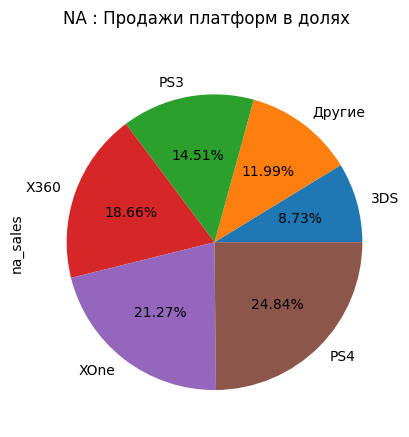

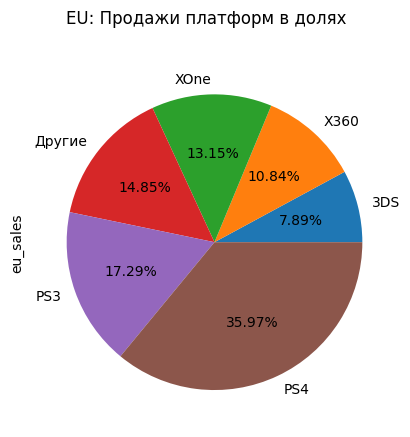

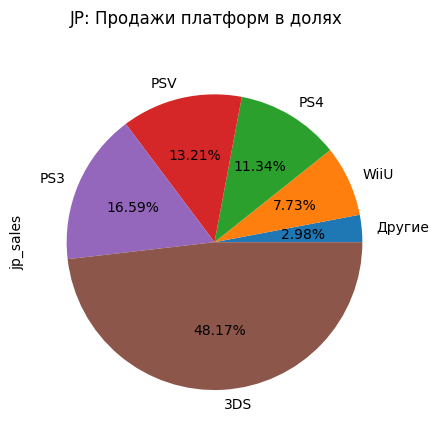

In [68]:
def plot_sales_pie_chart(data, index, sales_column, title):
    data.pivot_table(index=index, values=sales_column, aggfunc=sum)\
        .sort_values(by=sales_column)\
        .plot(kind='pie', subplots=True, title=title, autopct='%0.2f%%', legend=False)

# Построение графиков для каждого региона
plot_sales_pie_chart(na_sales_data_2013_on_2016, 'pie_cat_platforms', 'na_sales', 'NA : Продажи платформ в долях')
plot_sales_pie_chart(eu_sales_data_2013_on_2016, 'pie_cat_platforms', 'eu_sales', 'EU: Продажи платформ в долях')
plot_sales_pie_chart(jp_sales_data_2013_on_2016, 'pie_cat_platforms', 'jp_sales', 'JP: Продажи платформ в долях')

>Топ-5 популярных платформ с Северной Америке:
>* PS4
>* XOne
>* X360
>* PS3
>* 3DS

*В северной америке нельзя сказать, что американская компания Microcoft пользуется большим спросом, чем Sony и Nintendo.  Американцы больше любят игровые приставки, чем карманные консоли*

>Топ-5 популярных платформ в Европе:
>* PS4
>* PS3
>* XOne
>* X360
>* 3DS

*В европе любят игровые приставки(чаще от японской компании Sony), карманные консоли пользуются меньшей популярностью*

> Топ-5 популярных платформ в Японии:
>* 3DS
>* PS3
>* PSV
>* PS4
>* WiiU

*Японцы - фанаты карманных консолей. Но игровые приставки не занимают последнее место в их рейтинге платформ. Как видно, японцы доверяют только своим японским компаниям Sony и Nintendo ^_^*

### 4.4 Топ-5 жанров у пользователей

Посмотрим на общую картину 

In [69]:
#Посмотрим на суммарные продажи
create_pivot_table(data_2013_on_2016, index='genre', aggfunc=sum)

,eu_sales,jp_sales,na_sales
genre,,,
Puzzle,1.000000,1.180000,0.830000
Strategy,4.220000,1.770000,3.280000
Simulation,10.920000,4.520000,4.860000
Adventure,8.250000,5.820000,7.140000
Racing,20.190000,2.300000,12.960000
Fighting,8.550000,7.650000,15.550000
Platform,15.580000,4.790000,18.140000
Misc,20.040000,9.200000,27.490000
Role-Playing,36.970000,51.040000,46.400000


In [70]:
#Посмотрим на средние продажи жанров в регионах
create_pivot_table(data_2013_on_2016, index='genre', aggfunc="median", margins=False)

,eu_sales,jp_sales,na_sales
genre,,,
Adventure,0.000000,0.010000,0.000000
Puzzle,0.000000,0.020000,0.000000
Simulation,0.035000,0.000000,0.000000
Strategy,0.025000,0.000000,0.000000
Misc,0.010000,0.020000,0.010000
Action,0.020000,0.010000,0.020000
Role-Playing,0.010000,0.050000,0.020000
Racing,0.060000,0.000000,0.030000
Fighting,0.020000,0.030000,0.045000


Action несмотря на свои суммарные продажи не так хорош в средней выручке) ролевые игры в Японии не только в сумме хороши, но и в средней выручке

------

*Разберемся с Северной Америкой:*
- найдем нетоповые жанры, заменим их на "Другие"
- узнаем продажи жанров в сумме и в долях

In [71]:
na_sales_data_2013_on_2016 = pivot_and_filter(na_sales_data_2013_on_2016, index_col='genre', values_col='na_sales', new_column='pie_cat_genre')
na_sales_data_2013_on_2016

Порог продаваемости (медианное значение): 18.14


'Таблица до исправлений'

,na_sales
genre,
Puzzle,0.830000
Strategy,3.280000
Simulation,4.860000
Adventure,7.140000
Racing,12.960000
Fighting,15.550000
Platform,18.140000
Misc,27.490000
Role-Playing,46.400000


'Таблица после исправлений'

,na_sales
genre,
Puzzle,Другие
Strategy,Другие
Simulation,Другие
Adventure,Другие
Racing,Другие
Fighting,Другие
Platform,18.14
Misc,27.49
Role-Playing,46.4


,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,sum_sales,pie_cat_platforms,pie_cat_genre
0,Grand Theft Auto V,PS3,2013,Action,7.02,97.0,8.2,M,21.05,PS3,Action
1,Grand Theft Auto V,X360,2013,Action,9.66,97.0,8.1,M,16.27,X360,Action
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,NaN,NaN,NaN,14.63,PS4,Shooter
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,NaN,NaN,NaN,14.60,3DS,Role-Playing
4,Grand Theft Auto V,PS4,2014,Action,3.96,97.0,8.3,M,12.62,PS4,Action
...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01,Другие,Другие
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN,NaN,NaN,0.01,Другие,Misc
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN,NaN,NaN,0.01,PS3,Action
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01,Другие,Другие


----

*Разберемся с Европой*
- найдем нетоповые жанры, заменим их на "Другие"
- узнаем продажи жанров в сумме и в долях

In [72]:
eu_sales_data_2013_on_2016 = pivot_and_filter(eu_sales_data_2013_on_2016, index_col='genre', values_col='eu_sales', new_column='pie_cat_genre')
eu_sales_data_2013_on_2016

Порог продаваемости (медианное значение): 20.04


'Таблица до исправлений'

,eu_sales
genre,
Puzzle,1.000000
Strategy,4.220000
Adventure,8.250000
Fighting,8.550000
Simulation,10.920000
Platform,15.580000
Misc,20.040000
Racing,20.190000
Role-Playing,36.970000


'Таблица после исправлений'

,eu_sales
genre,
Puzzle,Другие
Strategy,Другие
Adventure,Другие
Fighting,Другие
Simulation,Другие
Platform,Другие
Misc,20.04
Racing,20.19
Role-Playing,36.97


,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,sum_sales,pie_cat_platforms,pie_cat_genre
0,Grand Theft Auto V,PS3,2013,Action,9.09,97.0,8.2,M,21.05,PS3,Action
1,Grand Theft Auto V,X360,2013,Action,5.14,97.0,8.1,M,16.27,X360,Action
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,NaN,NaN,NaN,14.63,PS4,Shooter
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.19,NaN,NaN,NaN,14.60,3DS,Role-Playing
4,Grand Theft Auto V,PS4,2014,Action,6.31,97.0,8.3,M,12.62,PS4,Action
...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01,Другие,Другие
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,NaN,NaN,NaN,0.01,Другие,Misc
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,NaN,NaN,NaN,0.01,PS3,Action
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,NaN,NaN,NaN,0.01,Другие,Другие


-----

*Разберемся с Японией:*
- найдем нетоповые жанры, заменим их на "Другие"
- узнаем продажи жанров в сумме и в долях

In [73]:
jp_sales_data_2013_on_2016 = pivot_and_filter(jp_sales_data_2013_on_2016, index_col='genre', values_col='jp_sales', new_column='pie_cat_genre')
jp_sales_data_2013_on_2016

Порог продаваемости (медианное значение): 5.82


'Таблица до исправлений'

,jp_sales
genre,
Puzzle,1.180000
Strategy,1.770000
Racing,2.300000
Simulation,4.520000
Platform,4.790000
Sports,5.410000
Adventure,5.820000
Shooter,6.610000
Fighting,7.650000


'Таблица после исправлений'

,jp_sales
genre,
Puzzle,Другие
Strategy,Другие
Racing,Другие
Simulation,Другие
Platform,Другие
Sports,Другие
Adventure,5.82
Shooter,6.61
Fighting,7.65


,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating,sum_sales,pie_cat_platforms,pie_cat_genre
0,Grand Theft Auto V,PS3,2013,Action,0.98,97.0,8.2,M,21.05,PS3,Action
1,Grand Theft Auto V,X360,2013,Action,0.06,97.0,8.1,M,16.27,Другие,Action
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,NaN,NaN,NaN,14.63,PS4,Shooter
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.35,NaN,NaN,NaN,14.60,3DS,Role-Playing
4,Grand Theft Auto V,PS4,2014,Action,0.38,97.0,8.3,M,12.62,PS4,Action
...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.01,NaN,NaN,NaN,0.01,PSV,Adventure
2229,Aiyoku no Eustia,PSV,2014,Misc,0.01,NaN,NaN,NaN,0.01,PSV,Misc
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.01,NaN,NaN,NaN,0.01,PS3,Action
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.01,NaN,NaN,NaN,0.01,PSV,Adventure


**Соберем все пироги в один ряд**

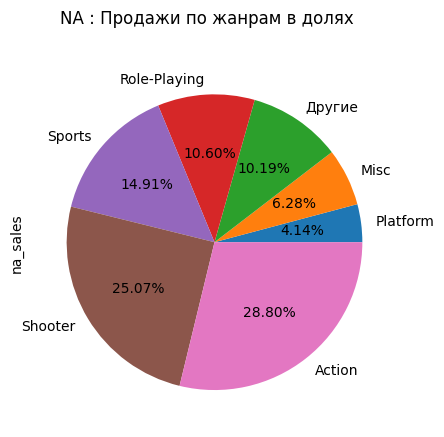

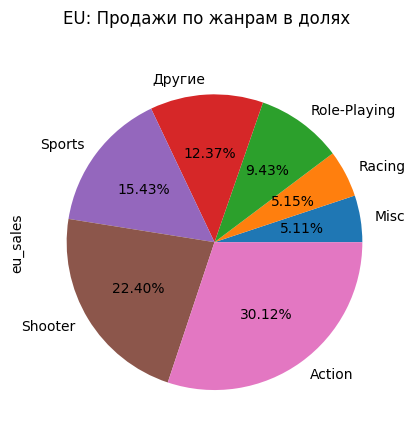

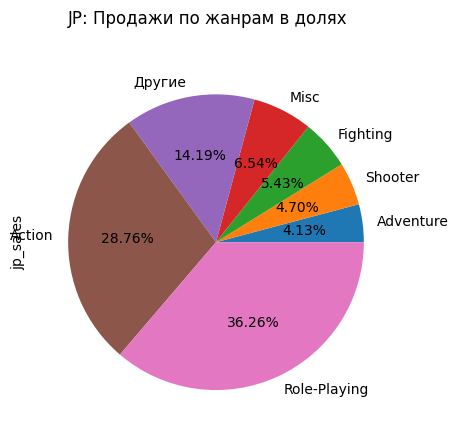

In [74]:
# Построение графиков для каждого региона
plot_sales_pie_chart(na_sales_data_2013_on_2016, 'pie_cat_genre', 'na_sales', 'NA : Продажи по жанрам в долях')
plot_sales_pie_chart(eu_sales_data_2013_on_2016, 'pie_cat_genre', 'eu_sales', 'EU: Продажи по жанрам в долях')
plot_sales_pie_chart(jp_sales_data_2013_on_2016, 'pie_cat_genre', 'jp_sales', 'JP: Продажи по жанрам в долях')

>Топ-5 популярных жанров в Северной Америке:
>* Action
>* Shooter
>* Spots
>* Role-Playing
>* Misc


>Топ-5 популярных жанров в Европе:
>* Action
>* Shooter
>* Spots
>* Role-Playing
>* Racing



> Топ-5 популярных жанров в Японии:
>* Role-Playing
>* Action
>* Misc
>* Fighting
>* Shooter

*Очень интересная особенность в Японии: стрелялки у них не популярны, а вот лидирует у них больше ролевые игры(что не скажешь о европе и северной америке).*

*В [role_playing](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F_%D0%B8%D0%B3%D1%80%D0%B0#:~:text=%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B0%D1%8F%20%D1%80%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F%20%D0%B8%D0%B3%D1%80%D0%B0%20(%D0%B0%D0%BD%D0%B3%D0%BB.,%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%B0%20%D1%82%D1%80%D0%B0%D0%B4%D0%B8%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D1%85%20%D0%BD%D0%B0%D1%81%D1%82%D0%BE%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D1%80%D0%BE%D0%BB%D0%B5%D0%B2%D1%8B%D1%85%20%D0%B8%D0%B3%D1%80.) игрок управляет одним или несколькими персонажами, каждый из которых описан набором численных характеристик, списком способностей и умений. Этот жанр зародился в Японии, и остается до сих пор очень популярным у японцев.*


*В европе и северной америке разницы в жанрах почти нет, игроки в этих регионах любят боевики(action) и стрелялки. Про боевики ни один из этих регионов не забывает :)*

-----

### 4.5 Влияние рейтинга ESRB на продажи в отдельном регионе

In [75]:
#Посмотрим на общую картину
create_pivot_table(data_2013_on_2016, index='rating', aggfunc=sum)


,eu_sales,jp_sales,na_sales
rating,,,
T,41.950000,20.590000,49.790000
E10+,42.690000,5.890000,54.240000
E,83.360000,15.140000,79.050000
M,145.320000,14.110000,165.210000
All,313.320000,55.730000,348.290000


In [76]:
create_pivot_table(data_2013_on_2016, index='rating', aggfunc="median", margins=False)

,eu_sales,jp_sales,na_sales
rating,,,
T,0.040000,0.010000,0.040000
E,0.055000,0.000000,0.050000
E10+,0.100000,0.000000,0.120000
M,0.130000,0.000000,0.140000


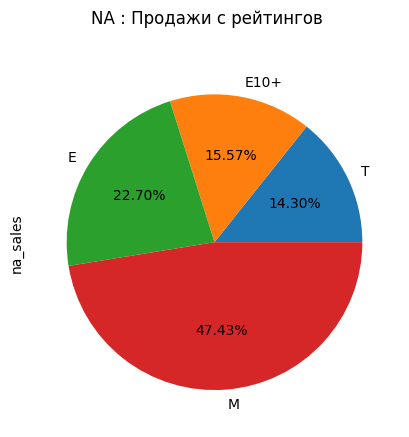

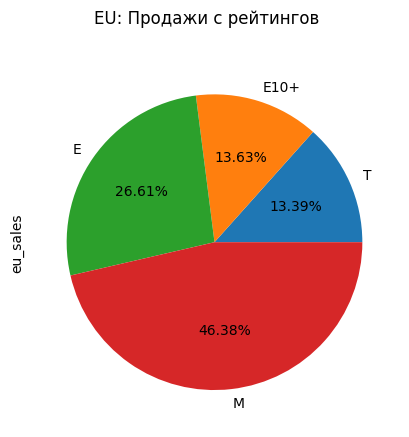

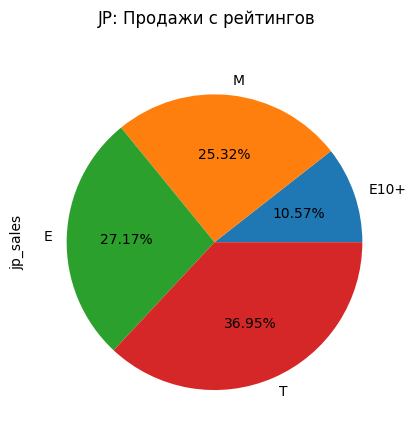

In [77]:
# Построение графиков для каждого региона
plot_sales_pie_chart(na_sales_data_2013_on_2016, 'rating', 'na_sales', 'NA : Продажи с рейтингов')
plot_sales_pie_chart(eu_sales_data_2013_on_2016, 'rating', 'eu_sales', 'EU: Продажи с рейтингов')
plot_sales_pie_chart(jp_sales_data_2013_on_2016, 'rating', 'jp_sales', 'JP: Продажи с рейтингов')

> Как видно, ни один регион не увлекается играми с рейтингом AO. 
> *Маленькая особеность: в европе и северной америке преобладают игры с рейтингом М(17+). Видимо это из-за их любви к стрелялкам и экшену*

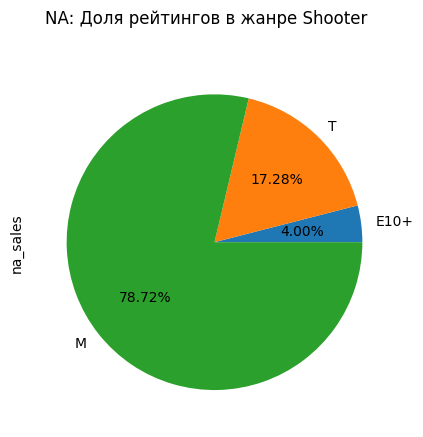

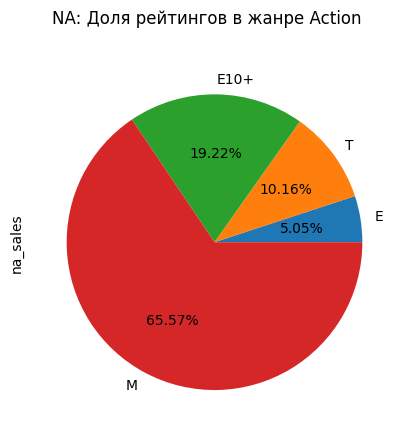

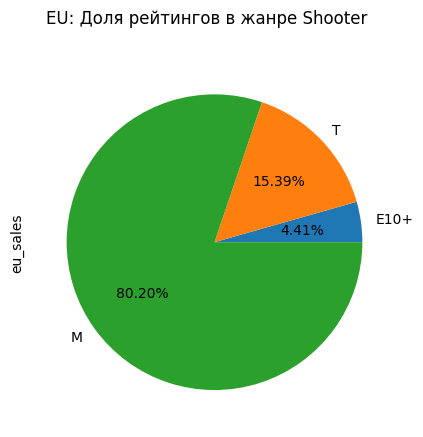

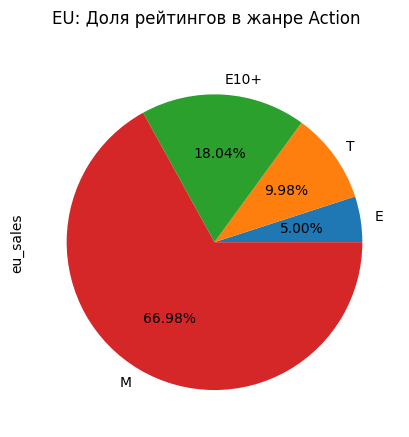

In [78]:
na_sales_data_2013_on_2016.query('genre=="Shooter"').pivot_table(index = 'rating' , values = 'na_sales', aggfunc = sum )\
.sort_values(by= 'na_sales')\
.plot(kind = 'pie', subplots = True, title = 'NA: Доля рейтингов в жанре Shooter', autopct='%0.2f%%', legend = False);

na_sales_data_2013_on_2016.query('genre=="Action"').pivot_table(index = 'rating' , values = 'na_sales', aggfunc = sum )\
.sort_values(by= 'na_sales')\
.plot(kind = 'pie', subplots = True, title = 'NA: Доля рейтингов в жанре Action', autopct='%0.2f%%', legend = False);

eu_sales_data_2013_on_2016.query('genre=="Shooter"').pivot_table(index = 'rating' , values = 'eu_sales', aggfunc = sum )\
.sort_values(by= 'eu_sales')\
.plot(kind = 'pie', subplots = True, title = 'EU: Доля рейтингов в жанре Shooter', autopct='%0.2f%%', legend = False);

eu_sales_data_2013_on_2016.query('genre=="Action"').pivot_table(index = 'rating' , values = 'eu_sales', aggfunc = sum )\
.sort_values(by= 'eu_sales')\
.plot(kind = 'pie', subplots = True, title = 'EU: Доля рейтингов в жанре Action', autopct='%0.2f%%', legend = False);


> Да, стрелялки и экшены(которые интересны в европе и северной америке) в основном с рейтингом 17+)

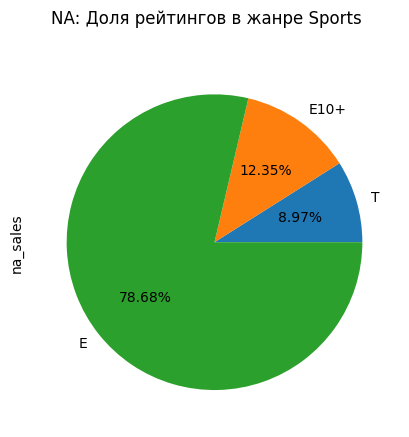

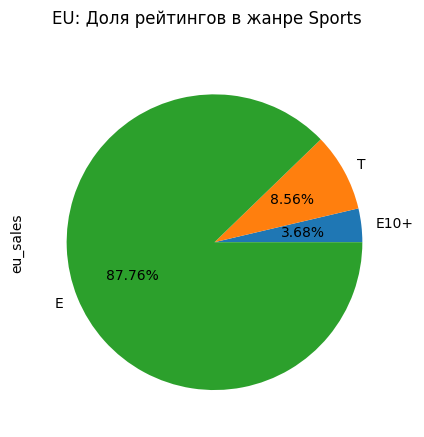

In [79]:
na_sales_data_2013_on_2016.query('genre=="Sports"').pivot_table(index = 'rating' , values = 'na_sales', aggfunc = sum )\
.sort_values(by= 'na_sales')\
.plot(kind = 'pie', subplots = True, title = 'NA: Доля рейтингов в жанре Sports', autopct='%0.2f%%', legend = False);

eu_sales_data_2013_on_2016.query('genre=="Sports"').pivot_table(index = 'rating' , values = 'eu_sales', aggfunc = sum )\
.sort_values(by= 'eu_sales')\
.plot(kind = 'pie', subplots = True, title = 'EU: Доля рейтингов в жанре Sports', autopct='%0.2f%%', legend = False);

**Напоследок найдем самый игроманский регион**

In [80]:
data_2013_on_2016.pivot_table(index = 'sum_sales',
             values = ['na_sales', 'eu_sales', 'jp_sales'], 
             aggfunc = sum, margins=True ).query('index == "All" ')

,eu_sales,jp_sales,na_sales
sum_sales,,,
All,392.23,140.78,437.71


In [81]:
data_2013_on_2016.pivot_table(index = 'sum_sales',
             values = ['na_sales', 'eu_sales', 'jp_sales'], 
             aggfunc = 'median', margins=True ).query('index == "All" ')

,eu_sales,jp_sales,na_sales
sum_sales,,,
All,0.03,0.01,0.02


>Медиана показала, что средние продажи чуть-чуть в европе от игр все таки выше, чем в Северной Америке. Хотя в сумме продаж побеждает  Америка.

>Так как мы ищем где больше всего игроманов, то Северная Америка лидирует

# 5. Гипотезы

Проверка гипотез начинается с формулирования нулевой гипотезы. Исходя из нее формилируется альтернативная гипотеза. Нулевая гипотеза всегдда формулируется так, чтобы использовать знак равенства

**Гипотезы проверяются только на актуальных данных**

*Задание*: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверять будем гипотезу о равенстве средних двух генеральных совокупностей. Общепринятые пороговые значения 5% и 1%. То есть выше 5% гипотеза не отвергается.

Но - Средние пользовательские рейтинги платформ Xbox One и PC равны

Н1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны

Проведем универсальный t-тест, он работает для выборки любого размера

**Перед проверкой гипотез удалим строки с пропусками**

In [82]:
data_2013_on_2016_not_nan = data_2013_on_2016.dropna(subset=['user_score'])

Чтобы узнать какое значение задать для equal_var, найдем размер выборок

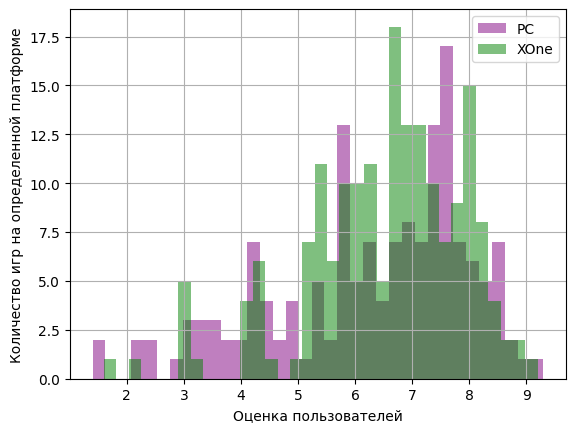

In [83]:
data_2013_on_2016_not_nan[data_2013_on_2016_not_nan['platform']=='PC']['user_score'].hist(bins=35, alpha=0.5, color='purple');
data_2013_on_2016_not_nan[data_2013_on_2016_not_nan['platform']=='XOne']['user_score'].hist(bins=35, alpha=0.5, color='green');
plt.legend(['PC', 'XOne'])
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество игр на определенной платформе')
plt.show()

данные скошено вправо у обеих выборок, то есть их распределение не стремится к нормальному. Больше высоких оценок у PC

In [84]:
len(data_2013_on_2016_not_nan.loc[data['platform']=='XOne']['user_score'])

29

In [85]:
len(data_2013_on_2016_not_nan.loc[data['platform']=='PC']['user_score'])

36

Размеры разные, значит equal_var = False. Тем самым мы указали, что дисперсии в выборках не равны

In [86]:
from scipy import stats as st
results_1 = st.ttest_ind(data_2013_on_2016_not_nan.loc[data['platform']=='XOne']['user_score'], 
                         data_2013_on_2016_not_nan.loc[data['platform']=='PC']['user_score'], equal_var= False)
alpha = .05
print('p-значение:', results_1.pvalue)
if results_1.pvalue< alpha:
    print('Отвергаем Ho')
else:
    print('Не получилось отвергнуть Ho')

p-значение: 0.553640212269356
Не получилось отвергнуть Ho


То есть вероятность случайно встретить такое или большее различие равно почти 55,36%. То есть с вероятностью ~ 55,36 6% мы можем встретить случай, когда средние пользовательские рейтинги платформ Xbox One и PC равны. Так как вероятность больше 5%, то мы не отвергаем нулевую гипотезу.

*Задание 2 :* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Но - Средние пользовательские рейтинги жанров Action и Sports равны

Н1 -  Средние пользовательские рейтинги жанров Action и Sports не равны

Чтобы узнать какое значение задать для equal_var, найдем размер выборок

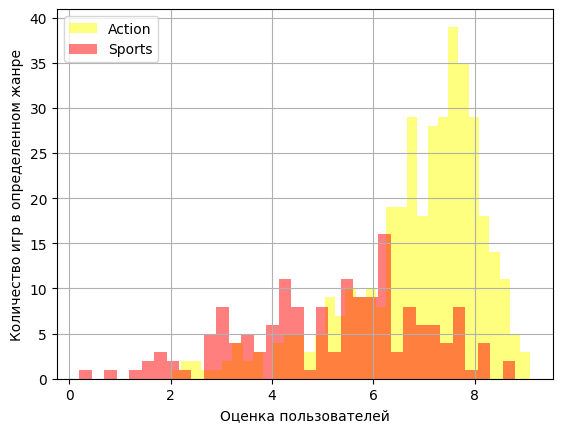

In [87]:
data_2013_on_2016_not_nan[data_2013_on_2016_not_nan['genre']=='Action']['user_score'].hist(bins=35, alpha=0.5, color='yellow');
data_2013_on_2016_not_nan[data_2013_on_2016_not_nan['genre']=='Sports']['user_score'].hist(bins=35, alpha=0.5, color='red');
plt.legend(['Action', 'Sports'])
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество игр в определенном жанре')
plt.show()

огонек :)) Данные у обоих датасетов скошены, то есть нет стремления к нормальному распределению. И по размеру не совсем одинаковы

In [88]:
len(data_2013_on_2016_not_nan.loc[data['genre']=='Action']['user_score'])

236

In [89]:
len(data_2013_on_2016_not_nan.loc[data['genre']=='Sports']['user_score'])

175

Размеры разные, значит equal_var = False. Тем самым мы указали, что дисперсии в выборках не равны

In [90]:
results_2 = st.ttest_ind(data_2013_on_2016_not_nan.loc[data['genre']=='Action']['user_score'], 
                         data_2013_on_2016_not_nan.loc[data['genre']=='Sports']['user_score'], equal_var= False)
alpha = .05
print('p-значение:', results_2.pvalue)
if results_2.pvalue< alpha:
    print('Отвергаем Ho')
else:
    print('Не получилось отвергнуть Ho')

p-значение: 0.9501751409122876
Не получилось отвергнуть Ho


Вероятность случайно встретить такое или большее различие ~95%. То есть с вероятностью ~ 95% мы можем встретить случай, когда средние пользовательские рейтинги жанров PC и Aсtion равны. Так как вероятность больше 5%, то мы не отвергаем нулевую гипотезу.

In [91]:
# все в одну функцию, чтобы не повторяться
xone = data_2013_on_2016_not_nan.loc[data_2013_on_2016_not_nan['platform']=='XOne']['user_score']
pc = data_2013_on_2016_not_nan.loc[data_2013_on_2016_not_nan['platform']=='PC']['user_score']
action = data_2013_on_2016_not_nan.loc[data_2013_on_2016_not_nan['genre']=='Action']['user_score']
sports = data_2013_on_2016_not_nan.loc[data_2013_on_2016_not_nan['genre']=='Sports']['user_score']
def confirm_gipotesus(seria_1, seria_2):
    results= st.ttest_ind(seria_1, seria_2, equal_var= False)
    alpha = .05
    print('p-значение:', results.pvalue)
    if results.pvalue< alpha:
        print('Отвергаем Ho')
    else:
        print('Не получилось отвергнуть Ho')

In [92]:
confirm_gipotesus(xone, pc)

p-значение: 0.14759594013430463
Не получилось отвергнуть Ho


In [93]:
confirm_gipotesus(action, sports)

p-значение: 1.4460039700704318e-20
Отвергаем Ho


In [94]:
data_2013_on_2016_not_nan.loc[data['genre']=='Action']['user_score'].shape

(236,)

In [95]:
action = data_2013_on_2016_not_nan.loc[data_2013_on_2016_not_nan['genre']=='Action']['user_score']
action.shape

(389,)

-----

<h1>Общий вывод<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Делая прогноз на 2017 год, стоит учитывать регион, в котором будет проводиться рекламная кампания.

1. В Японии отдают предпочтение:

* карманным консолям

* играм с жанром role_playing

* а возрастная категория не должна быть помехой для всех. Большим спросом пользуются игры с категорией E и T

* также японцы доверяют своим производителям, поэтому рекламировать стоит консоли от японских компаний Sony и Nintendo

2. В Северной Америке:

* предпочитают игровые приставки(наверное, чтобы собраться дома всей семьей :)))
* в Америке все производители консолей и приставок почти равны. Делать упор на какую-то конкретную компанию нет смысла
* Американцы отдают предпочтение следующим жанрам: экшену, спорту и стрелялкам
* Американцы тоже за доступность игр, чтобы рейтинг ниже 18+

3. В Европе:

* В Европе пользуются спросом приставки от японской компании Sony

* Приставки больше интересуют потенциальных покупателей, чем ручные консоли
* И поиграть любят в игры с рейтингом доступных для всех 
* Что касается жанров: европейцы любят экшен, стрелялки и спорт (также как и американцы)

*Европа и Северная Америка очень близки по игровому менталитету. Но в Северной Америке больше свободы (или выбора) для компаний, там игроманам, видимо, не важно от какой компании произведена игра: Sony, Microsoft, Nintendo. Главное, чтобы у приставки могло собраться несколько человек. Ручные консоли в этих двух регионах отдают предпочтение в послденюю очередь*

*Япония отличилась своей преданностью к японским фирмам. Показала, что стоит обратить внимание на продвижение ручных консолей в их регионе. И дала знать какой у них любимый жанр: role-playing. Но экшен и спорт они почти также любят, как в европе и северной америке*

**Также не стоит забывать, что Северная Америка приносит намного больше прибыли от покупок игр, чем Европа и тем более Япония. То есть поиграть больше любят именно в свободном от 'монополизации' игровых компаний регионе(Северной Америке :) )**

Но, может, другие регионы плохо знакомы с дейтсвительно хорошими играми? Но как мы выяснили, оценки пользователей и критиков либо не влияют, либо практически не влияют на продажи. Поэтому будем ссылаться на менталитет каждого региона :)